In [ ]:
import re
import pandas as pd
import numpy as np
# testando o do scikit-learn
from sklearn.preprocessing import OneHotEncoder
from torch.utils.data import Dataset, DataLoader

# OneHot encoding para as SMILES

## Tokenization

In [2]:
class BasicSmilesTokenizer(object):
  def __init__(self):
    self.regex_pattern = r"""(\[[^\]]+]|Br?|Cl?|Nb?|In?|Sb?|As|Ai|Ta|Ga|O|P|F|H|b|c|n|o|s|p|\(|\)|\.|=|#|-|\+|\\|\/|:|~|@|\?|>>?|\*|\$|\%[0-9]{2}|[0-9])"""
    self.regex = re.compile(self.regex_pattern)

  def tokenize(self, text):
    tokens = [token for token in self.regex.findall(text)]
    return tokens

TOKENIZER = BasicSmilesTokenizer()

## One-hot encoding - SKLEARN

In [3]:
qm9_subset = [
    ["CCCCNC=O", 7.54],
    ["C#CC1CN2N=CC=C12", 4.27],
    ["CC12CC1(O)CCOC2", 2.32],
    ["CC1(CO)OC2CNC12", 3.39],
    ["O=C1CCC11COCO1", 3.07],
    ["OC1COC1=N", 5.39],
    ["CC#CC12CC(O1)C2O", 3.28],
    ["OC1C2CC1C(C2)C=O", 3.98],
    ["CN1N=CN=C(N)C1=O", 2.57],
    ["CCC(C)(C)C(=O)NC", 2.92],
    ["O=C1NCC23CC(O2)C13", 3.24],
    ["OCC12C(O)C3C1OC23", 2.46],
    ["OCC(=O)C1C2COC12", 4.17],
    ["CC12C(O)C1C(O)C2O", 2.31],
    ["CC1NC(=O)C1N1CC1", 2.22],
    ["COC=NC1=NC=CN1", 6.86],
    ["CC1=C(C=O)C(=O)OC1", 2.28],
    ["CCC1=CN=CC(O)=C1", 3.01],
    ["CC12CC1(CCO)CO2", 3.33],
    ["O=CCC(=O)CC1CN1", 3.34],
    ["CC(=O)C1(CO1)C1CN1", 2.7],
    ["O=C1CCCOC(=O)N1", 2.33],
    ["CCCN1C=NC(O)=C1", 4.97],
    ["CC12OC1C1(C)CC2C1", 3.07],
    ["NC(=O)N1C=NNC1=N", 2.92],
    ["COC(C)(C)CC(C)C", 2.38],
    ["CC1CNC(=O)N1C", 2.85],
    ["OCC1(CC(O)C1)C#N", 2.49],
    ["C1C2OC1C1=C2NN=N1", 4.36],
    ["CC12CC(O)C(O1)C=C2", 2.7],
    ["CCC#CC1(C)COC1", 3.57]
]

qm9_tokenized = [TOKENIZER.tokenize(smile) for smile, label in qm9_subset]
qm9_labels = [label for smile, label in qm9_subset]

all_tokens = [token for sublist in qm9_tokenized for token in sublist]

all_tokens_reshaped = np.array(all_tokens).reshape(-1, 1)

encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(all_tokens_reshaped)

OneHotEncoder(handle_unknown='ignore')

In [4]:
qm9_encoded = [encoder.transform(np.array(smile_tokens).reshape(-1, 1)).toarray() for smile_tokens in qm9_tokenized]

print(qm9_encoded[0])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [5]:
encoder.inverse_transform(qm9_encoded[0])

array([['C'],
       ['C'],
       ['C'],
       ['C'],
       ['N'],
       ['C'],
       ['='],
       ['O']], dtype='<U1')

# One-hot encoding - Manual

In [6]:
vocab = [
    '#', '(', ')', '-', '/', '1', '2', '3', '4', '5', '6', '=', 'Br', 'C', 'Cl',
    'F', 'I', 'In', 'N', 'O', 'P', 'S', '[17O]', '[AlH-]', '[AlH2-]', '[AlH3-]',
    '[AsH3-]', '[BH-]', '[BH2-]', '[BH3-]', '[C-]', '[C@@H]', '[C@@]', '[C@H]',
    '[C@]', '[CH-]', '[CH2-]', '[CH2]', '[CH]', '[C]', '[GaH-]', '[GaH2-]', '[GaH3-]',
    '[InH-]', '[InH2-]', '[InH3-]', '[N+]', '[N-]', '[N@+]', '[N@@+]', '[N@@]', '[N@]',
    '[NH+]', '[NH-]', '[NH2+]', '[NH3+]', '[NH]', '[N]', '[NbH3-]', '[O+]', '[O-]', '[O]',
    '[PH+]', '[PH3-]', '[PH4-]', '[S+]', '[SbH3-]', '[Si]', '[TaH3-]', '[c-]', '[cH-]',
    '[n+]', '[n-]', '[nH+]', '[nH]', '[o+]', '\\', 'c', 'n', 'o', ''
]

qm9 = pd.read_csv('QM9.csv', index_col=0)
qm9.head()

,SMILES_1,SMILES_2,INCHI_1,INCHI_2,Property_0
0,OC1COC(=N)C1=O,O[C@H]1CO[C]([NH])C1=O,"InChI=1S/C4H5NO3/c5-4-3(7)2(6)1-8-4/h2,5-6H,1H2","InChI=1S/C4H5NO3/c5-4-3(7)2(6)1-8-4/h2,5-6H,1H...",3.49649
1,CN(C)C(=O)C=O,CN(C)C(=O)C=O,"InChI=1S/C4H7NO2/c1-5(2)4(7)3-6/h3H,1-2H3","InChI=1S/C4H7NO2/c1-5(2)4(7)3-6/h3H,1-2H3",3.92544
2,C1C2CC3N=COCC123,C1[C@H]2C[C@@H]3N=COC[C@]123,InChI=1S/C7H9NO/c1-5-2-7(5)3-9-4-8-6(1)7/h4-6H...,InChI=1S/C7H9NO/c1-5-2-7(5)3-9-4-8-6(1)7/h4-6H...,3.02103
3,OC1C2OC3CC2C13O,O[C@H]1[C@H]2O[C@@H]3C[C@H]2[C@]13O,"InChI=1S/C6H8O3/c7-5-4-2-1-3(9-4)6(2,5)8/h2-5,...","InChI=1S/C6H8O3/c7-5-4-2-1-3(9-4)6(2,5)8/h2-5,...",2.52006
4,OC1C2C(=N)OCC12O,O[C@H]1[C@H]2[C]([NH])OC[C@@]12O,"InChI=1S/C5H7NO3/c6-4-2-3(7)5(2,8)1-9-4/h2-3,6...","InChI=1S/C5H7NO3/c6-4-2-3(7)5(2,8)1-9-4/h2-3,6...",2.48587


In [7]:
smiles_list = qm9['SMILES_1'].tolist()
props = qm9['Property_0'].tolist()

In [8]:
def one_hot_encode(smiles_list, vocab):
    token_to_index = {token: i for i, token in enumerate(vocab)}
    one_hot_data = []

    for smile in smiles_list:
        tokens = TOKENIZER.tokenize(smile)
        one_hot_seq = []

        for token in tokens:
            vec = np.zeros(len(vocab), dtype=np.float32)
            idx = token_to_index[token]
            vec[idx] = 1.0
            one_hot_seq.append(vec)

        one_hot_seq = np.array(one_hot_seq, dtype=np.float32)
        one_hot_data.append(one_hot_seq)

    return np.array(one_hot_data, dtype=object)

In [9]:
one_hot_encoded = one_hot_encode(smiles_list, vocab)

print(one_hot_encoded[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Embedding

Seção feita para que seja possível compreender como funcionam os embeddings para a redução de dimensões em strings SMILES.

Esses dados não serão utilizados no modelo final.

In [10]:
import torch
import torch.nn as nn

In [11]:
def one_hot_to_indices(one_hot_array):
    return np.argmax(one_hot_array, axis=1)

In [12]:
print(one_hot_to_indices(one_hot_encoded[0]))

[19 13  5 13 19 13  1 11 18  2 13  5 11 19]


In [13]:
vocab_size = 82
embedding_dim = 64

embedding = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)

one_hot_encoded_idx = np.empty(one_hot_encoded.shape, dtype=object)

indexed_sequences = [one_hot_to_indices(seq) for seq in one_hot_encoded]

from torch.nn.utils.rnn import pad_sequence

indexed_tensors = [torch.tensor(seq, dtype=torch.long) for seq in indexed_sequences]
padded = pad_sequence(indexed_tensors, batch_first=True, padding_value=0)  # padding com o valor 0, mas nao tenho certeza se isso é comprometedor pro modelo

# Embedding
embedded = embedding(padded)

print(embedded.shape)

torch.Size([133885, 22, 64])


In [14]:
print("Tamanho real da SMILES 0:", len(indexed_sequences[0]))
print("Tamanho após padding:", padded[0].shape[0])
print("Embedding final:", embedded[0].shape)

Tamanho real da SMILES 0: 14
Tamanho após padding: 22
Embedding final: torch.Size([22, 64])


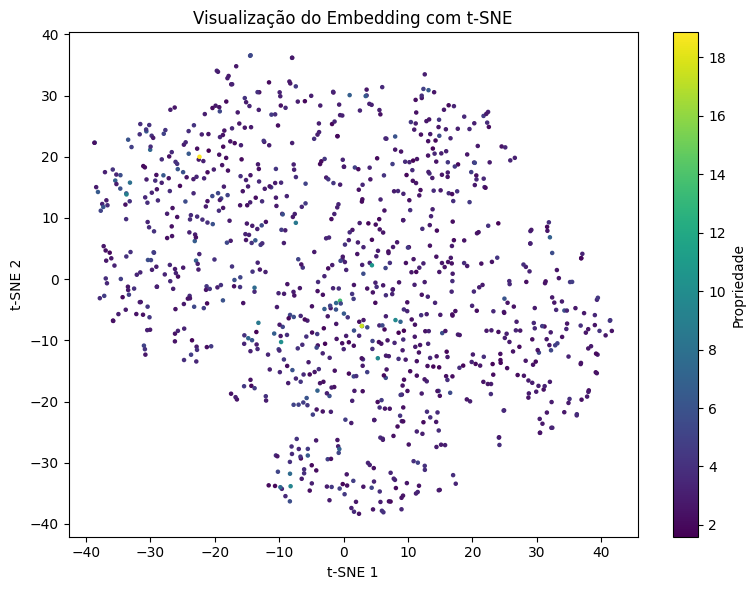

In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Supondo que embedded seja um tensor (batch, seq_len, emb_dim)
# Pegue o embedding médio de cada molécula:
embeddings = embedded.mean(dim=2).detach().numpy()  # shape: (batch, emb_dim)

# Reduza para 2D com t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_2d = tsne.fit_transform(embeddings[:1000])

# Visualize, colorindo por alguma propriedade (ex: props)
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=props[:len(embeddings_2d)], cmap='viridis', s=5)
plt.colorbar(label='Propriedade')
plt.title('Visualização do Embedding com t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.tight_layout()
plt.show()

# Construção da LSTM

In [16]:
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

In [17]:
class LSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, padding_idx, dropout=0.3):
      super().__init__()
      self.embedding = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim, padding_idx=padding_idx)
      self.lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_dim, batch_first=True, num_layers=num_layers, dropout=dropout)
      self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x, lengths):
      embedded = self.embedding(x)
      # print(">>> embedded.shape:", embedded.shape)

      lengths_on_cpu = lengths.to('cpu')
      packed_input = pack_padded_sequence(embedded, lengths_on_cpu, batch_first=True, enforce_sorted=False)
      packed_output, (hn, cn) = self.lstm(packed_input)

      last_hidden = hn[-1]
      return self.fc(last_hidden).squeeze(1)

In [18]:
def train_model(model, train_loader, val_loader, num_epochs, criterion, optimizer, device):
    train_losses = []
    val_losses = []

    model.to(device)
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for batch_x, lengths, batch_y in train_loader:
            batch_x = batch_x.to(device)
            lengths = lengths.to(device)
            batch_y = batch_y.to(device)
            optimizer.zero_grad()
            preds = model(batch_x, lengths)
            loss = criterion(preds, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        train_losses.append(total_loss)

        # Validação
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch_x, lengths, batch_y in val_loader:
                batch_x = batch_x.to(device)
                lengths = lengths.to(device)
                batch_y = batch_y.to(device)
                preds = model(batch_x, lengths)
                loss = criterion(preds, batch_y)
                val_loss += loss.item()
            val_losses.append(val_loss)
        print(f"Epoch {epoch+1}/{num_epochs} — Train Loss: {total_loss:.4f} — Val Loss: {val_loss:.4f}")

    return train_losses, val_losses

In [19]:
from torch.nn.utils.rnn import pad_sequence

padding_idx = 80
def collate_fn(batch):
  # print(batch)
  sequences = [seq for seq, _ in batch]
  labels = [label for _, label in batch]
  lengths = [len(seq) for seq in sequences]

  sequences_tensors = [torch.tensor(seq, dtype=torch.long) for seq in sequences]

  padded = pad_sequence(sequences_tensors, batch_first=True, padding_value=padding_idx)

  return padded, torch.tensor(lengths), torch.tensor(labels, dtype=torch.float32)


## Separação em treino e teste e dataloaders

In [20]:
from sklearn.model_selection import train_test_split

X = indexed_sequences
y = list(map(float, props))

# Primeiro split: treino + temp (validação + teste)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5,  random_state=24)
# Segundo split: validação + teste
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

train_data = list(zip(X_train, y_train))
val_data   = list(zip(X_val, y_val))
test_data  = list(zip(X_test, y_test))

print("Exemplo de train_data:", train_data[0])
print("Exemplo de val_data:", val_data[0])
print("Exemplo de test_data:", test_data[0])

Exemplo de train_data: (array([19, 11, 13, 13,  1, 11, 19,  2, 13,  5, 13, 13,  5, 13,  0, 13]), 2.76254)
Exemplo de val_data: (array([18, 13,  1, 11, 19,  2, 13,  1, 11, 18,  2, 18, 13,  5, 13, 13,  5]), 3.87733)
Exemplo de test_data: (array([15, 13,  5, 11, 13, 13,  1, 11, 18,  2, 13,  1, 15,  2, 11, 18, 19,
        5]), 3.29185)


In [21]:
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1)).flatten()
# y_val_scaled   = scaler.transform(np.array(y_val).reshape(-1, 1)).flatten()
# y_test_scaled  = scaler.transform(np.array(y_test).reshape(-1, 1)).flatten()

# train_data = list(zip(X_train, y_train_scaled))
# val_data   = list(zip(X_val, y_val_scaled))
# test_data  = list(zip(X_test, y_test_scaled))

In [22]:
X_train_filtered = [xi for xi, yi in zip(X_train, y_train) if yi <= 20]
y_train_filtered = [yi for xi, yi in zip(X_train, y_train) if yi <= 20]
X_val_filtered = [xi for xi, yi in zip(X_val, y_val) if yi <= 20]
y_val_filtered = [yi for xi, yi in zip(X_val, y_val) if yi <= 20]
X_test_filtered = [xi for xi, yi in zip(X_test, y_test) if yi <= 20]
y_test_filtered = [yi for xi, yi in zip(X_test, y_test) if yi <= 20]



# Normaliza apenas os dados filtrados
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(np.array(y_train_filtered).reshape(-1, 1)).flatten()
y_val_scaled   = scaler.transform(np.array(y_val_filtered).reshape(-1, 1)).flatten()
y_test_scaled  = scaler.transform(np.array(y_test_filtered).reshape(-1, 1)).flatten()

train_data = list(zip(X_train_filtered, y_train_scaled))
val_data   = list(zip(X_val_filtered, y_val_scaled))
test_data  = list(zip(X_test_filtered, y_test_scaled))

In [23]:
dataloader = DataLoader(train_data, batch_size=32, collate_fn=collate_fn)
val_dataloader = DataLoader(val_data, batch_size=32, collate_fn=collate_fn)

## Definindo o modelo e treinando efetivamente

In [993]:
import optuna
from optuna.exceptions import TrialPruned

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def objective(trial):
    hidden_dim = trial.suggest_categorical('hidden_dim', [32, 64, 128, 256])
    num_layers = trial.suggest_int('num_layers', 1, 6)
    dropout = trial.suggest_float('dropout', 0.1, 0.7)
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-2)
    weight_decay = trial.suggest_loguniform('weight_decay', 1e-6, 1e-2)
    embedding_dim = trial.suggest_categorical('embedding_dim', [16, 32, 64])

    model = LSTM(
        vocab_size=81,
        embedding_dim=embedding_dim,
        hidden_dim=hidden_dim,
        num_layers=num_layers,
        padding_idx=80,
        dropout=dropout
    ).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_function = nn.MSELoss(reduction='mean')

    train_losses = []
    val_losses = []

    num_epochs = 30
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for batch_x, lengths, batch_y in dataloader:
            batch_x = batch_x.to(device)
            lengths = lengths.to(device)
            batch_y = batch_y.to(device)
            optimizer.zero_grad()
            preds = model(batch_x, lengths)
            loss = loss_function(preds, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        train_losses.append(total_loss)

        # Validação
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch_x, lengths, batch_y in val_dataloader:
                batch_x = batch_x.to(device)
                lengths = lengths.to(device)
                batch_y = batch_y.to(device)
                preds = model(batch_x, lengths)
                loss = loss_function(preds, batch_y)
                val_loss += loss.item()
        val_losses.append(val_loss)

        # Reporta o valor intermediário para o Optuna
        trial.report(val_loss, epoch)

        # Pruning: interrompe se o trial for ruim
        if trial.should_prune():
            raise TrialPruned()

    return val_losses[-1]

pruner = optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=5)
study = optuna.create_study(direction='minimize', pruner=pruner)
study.optimize(objective, n_trials=75)

print("Melhores hiperparâmetros:", study.best_params)

[I 2025-05-19 16:35:27,177] A new study created in memory with name: no-name-786351d6-4f8d-48c1-8102-11ff65740e0b
/tmp/ipykernel_4697/3971718297.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-2)
/tmp/ipykernel_4697/3971718297.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-6, 1e-2)
[I 2025-05-19 16:38:43,254] Trial 0 finished with value: 4.838331871083938 and parameters: {'hidden_dim': 128, 'num_layers': 5, 'dropout': 0.4938509367408168, 'lr': 8.906912878346989e-05, 'weight_decay': 0.0010189099061037408, 'embedding_dim': 64}. Best is trial 0 with value: 4.8

Melhores hiperparâmetros: {'hidden_dim': 256, 'num_layers': 2, 'dropout': 0.3520475751955372, 'lr': 0.00038419788129315696, 'weight_decay': 1.0528482325186746e-06, 'embedding_dim': 16}


In [51]:
model = LSTM(vocab_size=81, embedding_dim=study.best_params['embedding_dim'],
                            hidden_dim=study.best_params["hidden_dim"], num_layers=study.best_params['num_layers'], padding_idx=80, dropout=study.best_params['dropout'])

loss_function = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=study.best_params['lr'], weight_decay=study.best_params['weight_decay'])

NameError: name 'study' is not defined

In [24]:
train_losses, val_losses = train_model(model=model, train_loader=dataloader, val_loader=val_dataloader, num_epochs=300, criterion=loss_function, optimizer=optimizer, device=device)

NameError: name 'model' is not defined

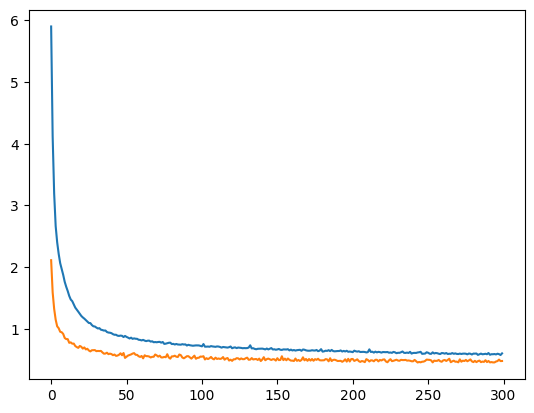

In [1005]:
import matplotlib.pyplot as plt

plt.plot(train_losses)
plt.plot(val_losses)
plt.show()

In [26]:
test_dataloader = DataLoader(test_data, batch_size=32, collate_fn=collate_fn)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

predictions_test = []
targets_test = []

with torch.no_grad():
    for batch_x, lengths, batch_y in test_dataloader:
        batch_x = batch_x.to(device)
        lengths = lengths.to(device)
        batch_y = batch_y.to(device)

        preds = model(batch_x, lengths)
        predictions_test.append(preds)
        targets_test.append(batch_y)

# Concatena todos os tensores da lista
predictions_test = torch.cat(predictions_test, dim=0)
targets_test = torch.cat(targets_test, dim=0)

erro_test = loss_function(predictions_test, targets_test)
print(f"Erro de Teste: {erro_test.item()}")


NameError: name 'model' is not defined

AttributeError: 'list' object has no attribute 'cpu'

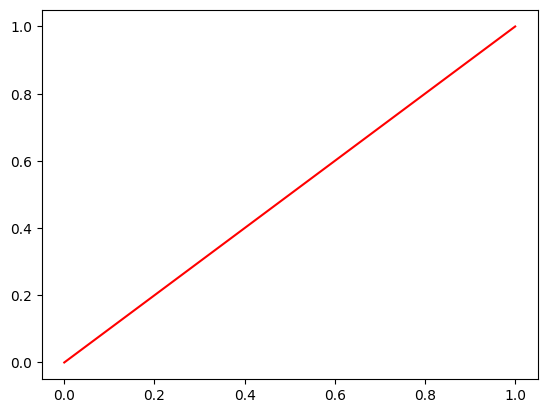

In [24]:

plt.plot([0, 1], [0, 1], 'red')
plt.plot(y_test_scaled, predictions_test.cpu().numpy(), '.')
plt.xlabel('y (real)')
plt.ylabel('y (predito)')
plt.show()

In [25]:
# Desfaz a normalização
y_true = scaler.inverse_transform(targets_test.cpu().numpy().reshape(-1, 1)).flatten()
y_pred = scaler.inverse_transform(predictions_test.cpu().numpy().reshape(-1, 1)).flatten()

print(y_true)
print(y_pred)

print(max(y_true))
print(max(y_pred))

# Gráfico real x predito
import matplotlib.pyplot as plt
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', label='Real')
plt.scatter(y_true, y_pred, alpha=0.7)
plt.xlabel('y (real)')
plt.ylabel('y (predito)')
plt.legend()
plt.show()

AttributeError: 'list' object has no attribute 'cpu'

In [27]:
torch.save(model.state_dict(), "model_lstm_qm9_16emb.pth")

NameError: name 'model' is not defined

# Utilizando o melhor modelo (Anterior)

In [28]:
import torch
from torch.serialization import safe_globals

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

with safe_globals([LSTM]):
    model = torch.load("model_lstm_qm9.pth", map_location=device, weights_only=False)

Erro de Teste: 0.00040780220297165215


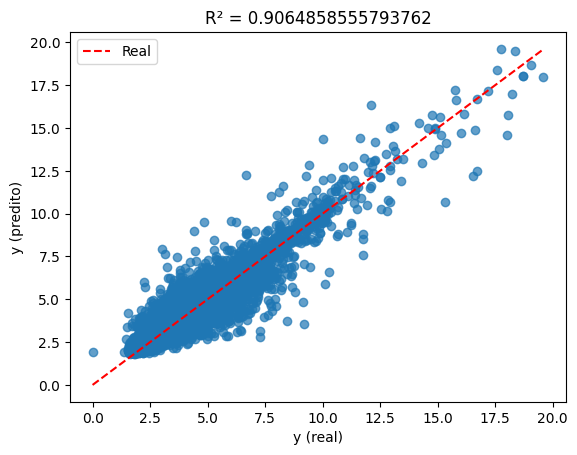

In [28]:
from sklearn.metrics import r2_score

test_dataloader = DataLoader(test_data, batch_size=32, collate_fn=collate_fn)


predictions_test = []
targets_test = []

loss_function = nn.MSELoss(reduction='mean')

with torch.no_grad():
    for batch_x, lengths, batch_y in test_dataloader:
        batch_x = batch_x.to(device)
        lengths = lengths.to(device)
        batch_y = batch_y.to(device)

        preds = model(batch_x, lengths)
        predictions_test.append(preds)
        targets_test.append(batch_y)

# Concatena todos os tensores da lista
predictions_test = torch.cat(predictions_test, dim=0)
targets_test = torch.cat(targets_test, dim=0)

erro_test = loss_function(predictions_test, targets_test)
print(f"Erro de Teste: {erro_test.item()}")

# Desfaz a normalização
y_true = scaler.inverse_transform(targets_test.cpu().numpy().reshape(-1, 1)).flatten()
y_pred = scaler.inverse_transform(predictions_test.cpu().numpy().reshape(-1, 1)).flatten()

r2 = r2_score(y_true=y_true, y_pred=y_pred)

# Gráfico real x predito
import matplotlib.pyplot as plt
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', label='Real')
plt.scatter(y_true, y_pred, alpha=0.7)
plt.xlabel('y (real)')
plt.ylabel('y (predito)')
plt.title(f"R² = {r2}")
plt.legend()
plt.show()

# Utilizando SHAP

In [40]:
import shap
import torch
from torch.nn.utils.rnn import pad_sequence

# Define variables
background_data = X_train_filtered[:100]  # Use subset of training data
samples_to_explain = X_test_filtered[:10]  # Explain 10 test samples

# Create a PyTorch-compatible wrapper that handles input conversion
class PyTorchLSTMWrapper(nn.Module):
    def __init__(self, original_model):
        super().__init__()
        self.model = original_model
        
    def forward(self, x):
        # Convert float tensor back to long for the model
        # First convert to integers, then to long tensor
        if x.dtype != torch.long:
            x_long = x.round().long()
        else:
            x_long = x
            
        # Calculate lengths from padded sequences
        lengths = torch.sum(x_long != padding_idx, dim=1)
        
        # Get prediction and add dimension to make 2D tensor
        output = self.model(x_long, lengths)
        return output.unsqueeze(1)  # Make output shape [batch_size, 1]

# Create wrapped model
wrapped_model = PyTorchLSTMWrapper(model).to(device)

# Prepare background data in tensor format
background_tensors = []
for seq in background_data[:10]:  # Use fewer samples if memory is an issue
    background_tensors.append(torch.tensor(seq, dtype=torch.long))

# Prepare test data in tensor format
test_tensors = []
for seq in samples_to_explain:
    test_tensors.append(torch.tensor(seq, dtype=torch.long))

# Find the maximum sequence length across all data
max_len = max(max(len(seq) for seq in background_tensors), 
              max(len(seq) for seq in test_tensors))

# Pad all sequences to same length
def pad_to_length(sequences, max_length, pad_value):
    padded_seqs = []
    for seq in sequences:
        if len(seq) < max_length:
            padding = torch.full((max_length - len(seq),), pad_value, dtype=seq.dtype)
            padded = torch.cat([seq, padding])
        else:
            padded = seq[:max_length]  # Truncate if too long
        padded_seqs.append(padded)
    return torch.stack(padded_seqs)

# Pad both datasets to the same length
background_padded = pad_to_length(background_tensors, max_len, padding_idx)
test_padded = pad_to_length(test_tensors, max_len, padding_idx)

# IMPORTANT: Convert to float for SHAP
background_padded_float = background_padded.float().to(device)
test_padded_float = test_padded.float().to(device)

# Verify shapes match
print(f"Background shape: {background_padded_float.shape}")
print(f"Test shape: {test_padded_float.shape}")

# Create a function that wraps predictions
def predict_fn(x):
    # Convert numpy to tensor
    x_tensor = torch.tensor(x, dtype=torch.long).to(device)
    with torch.no_grad():
        return wrapped_model(x_tensor).cpu().numpy()

# Use KernelExplainer instead
explainer = shap.KernelExplainer(predict_fn, background_padded.cpu().numpy())
shap_values = explainer.shap_values(test_padded.cpu().numpy())

Background shape: torch.Size([10, 18])
Test shape: torch.Size([10, 18])


100%|██████████| 10/10 [00:00<00:00, 10.73it/s]


/tmp/ipykernel_43488/1426043456.py:10: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(
/mnt/data/home/jdurao/Documentos/LSTMOneHot/venv/lib/python3.12/site-packages/shap/plots/_beeswarm.py:718: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


<Figure size 1200x800 with 0 Axes>

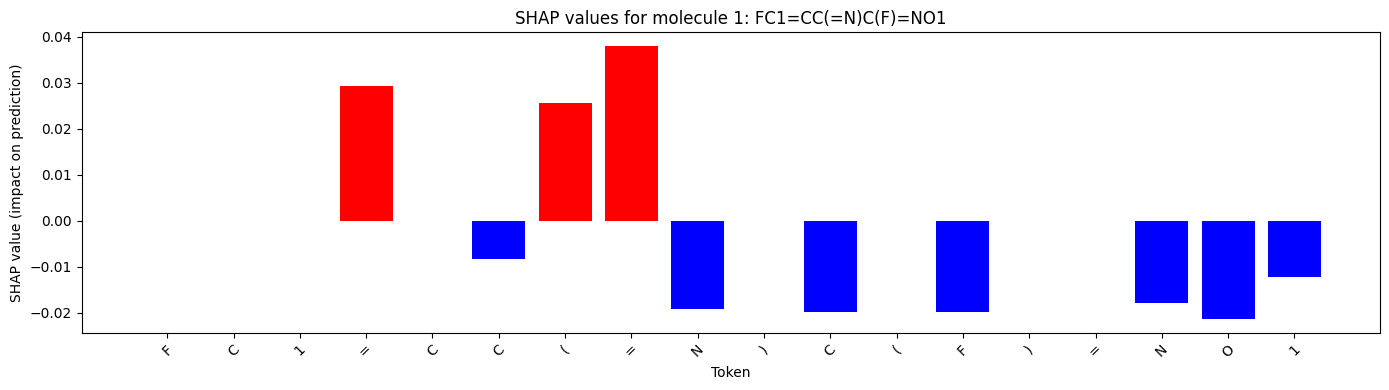

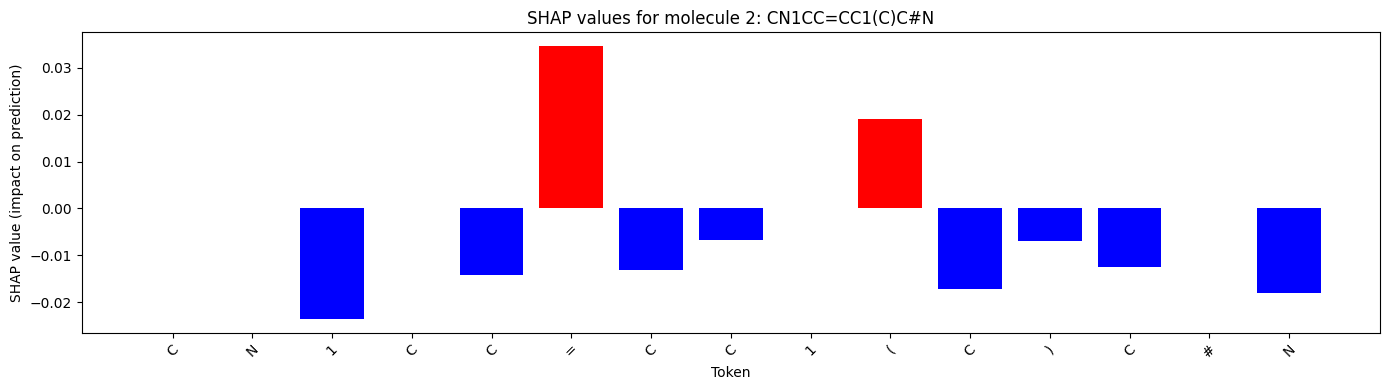

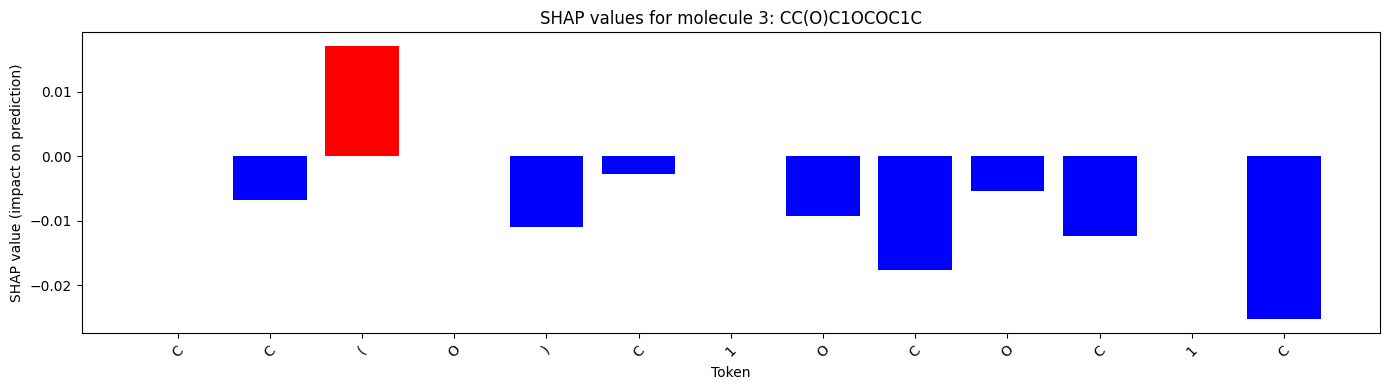

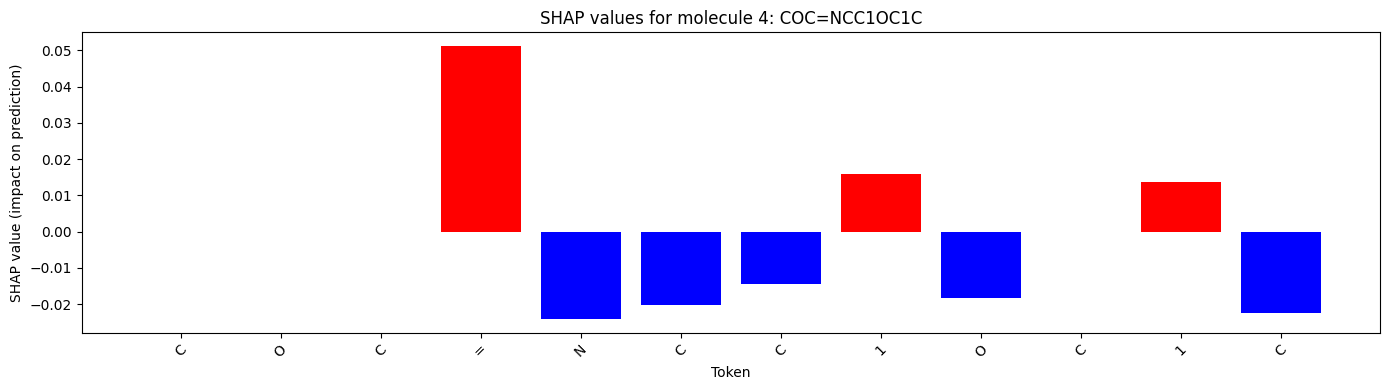

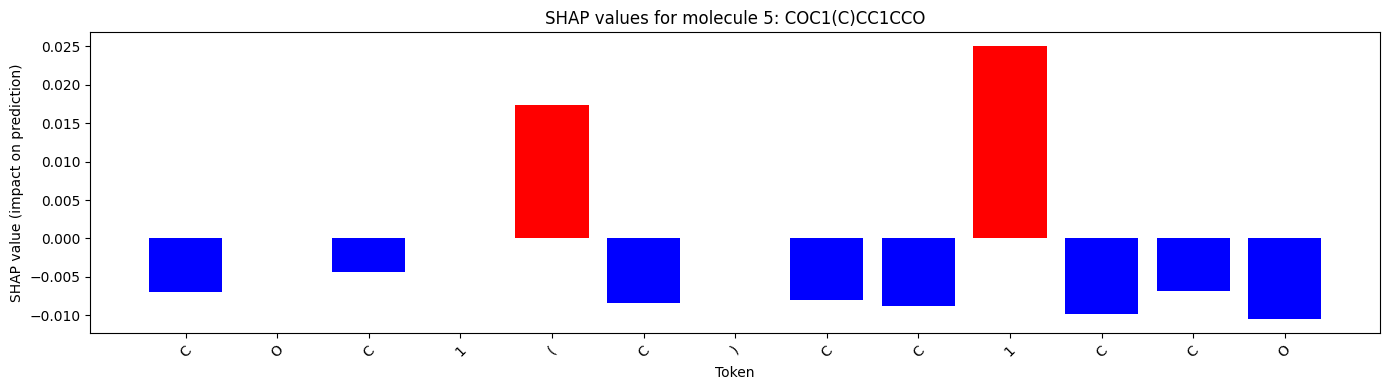

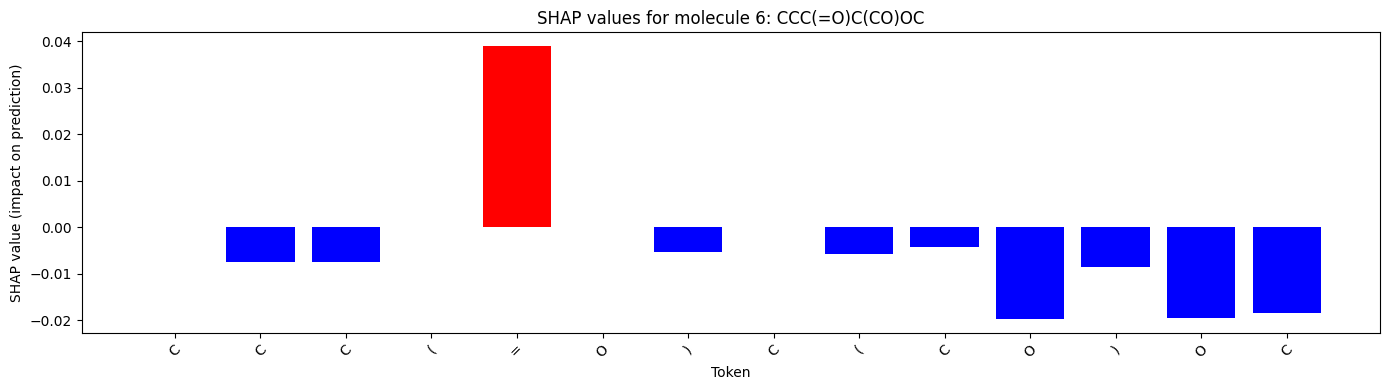

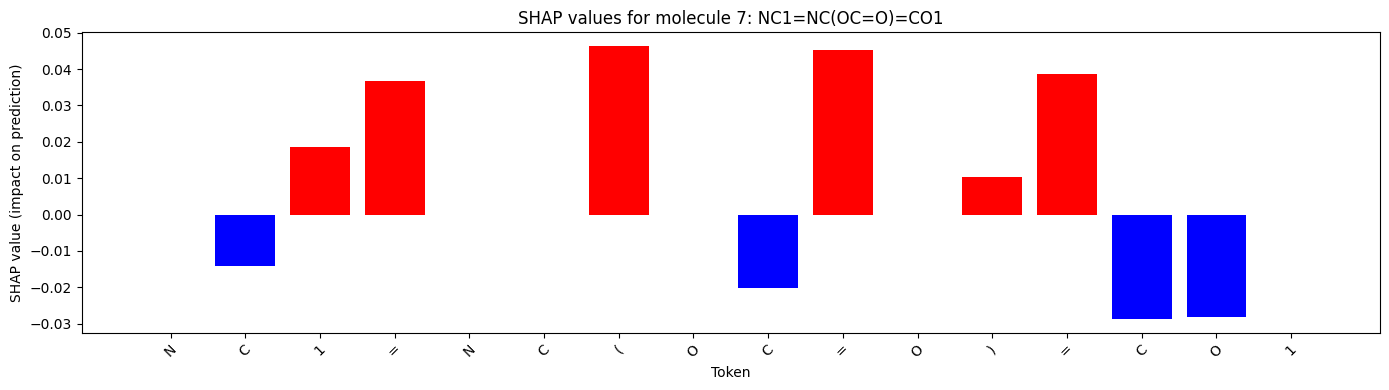

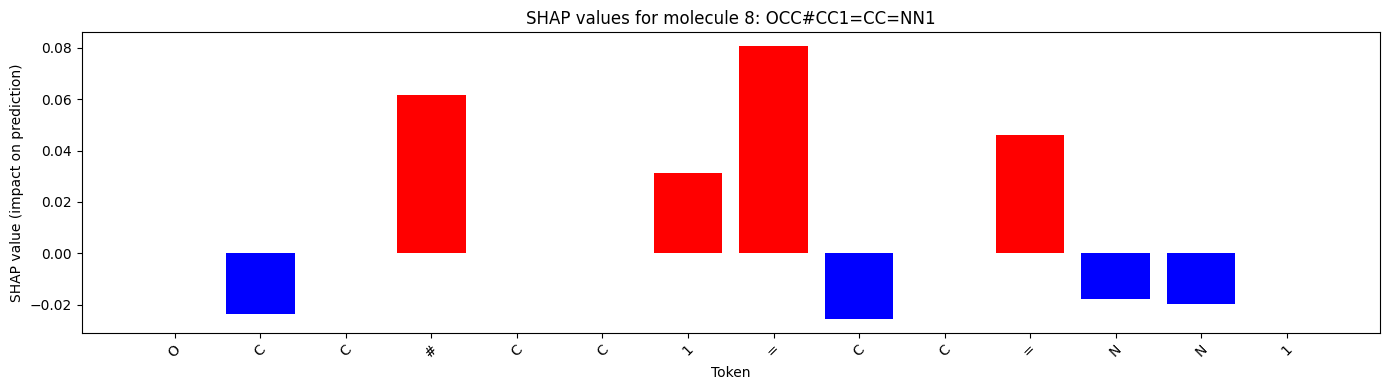

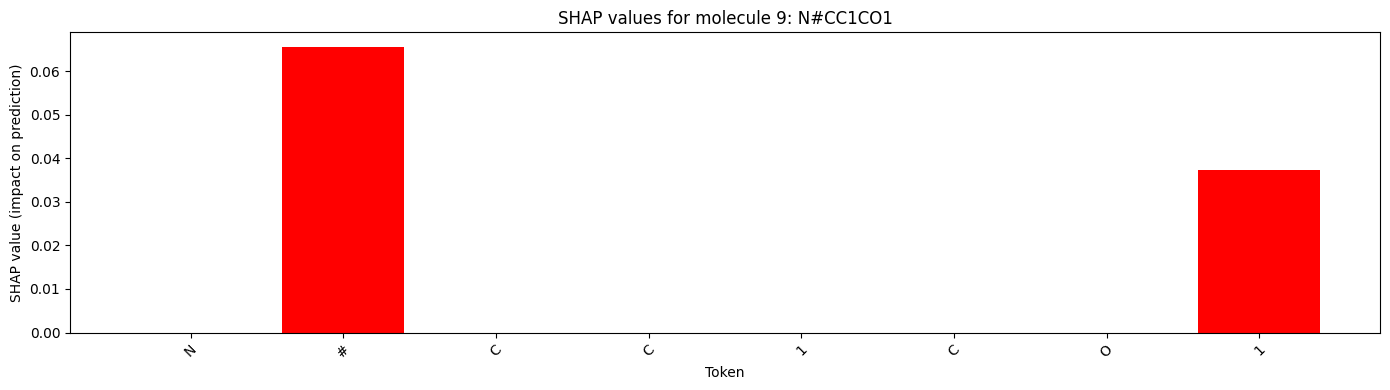

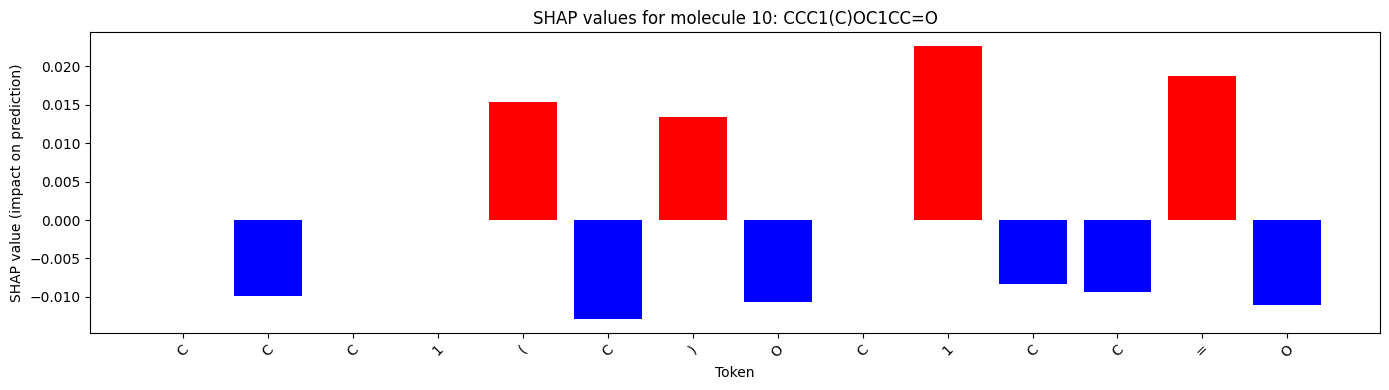

In [46]:
# Function to map indices back to tokens for visualization
def indices_to_tokens(indices_list):
    return [[vocab[idx] for idx in seq] for seq in indices_list]

# Convert sample indices to tokens for display
token_samples = indices_to_tokens(samples_to_explain)

# Create summary plot for all samples
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values, 
    test_padded.cpu().numpy(),
    feature_names=[f"Position {i}" for i in range(max_len)],
    show=False
)
plt.tight_layout()
plt.savefig('shap_summary.png')
plt.close()

# Visualize individual molecules
for i, (molecule, shap_vals) in enumerate(zip(token_samples, shap_values)):
    plt.figure(figsize=(14, 4))
    # Only show the actual length of this molecule
    length = len(molecule)
    
    # Fix: Ensure SHAP values are 1D by flattening or extracting first dimension
    if hasattr(shap_vals, 'shape') and len(shap_vals.shape) > 1:
        # If multi-dimensional, take first dimension
        shap_vals_flat = np.array(shap_vals[:length, 0] if shap_vals.shape[1] > 0 else shap_vals[:length])
    else:
        # Already 1D or list
        shap_vals_flat = np.array(shap_vals[:length])
    
    # Generate colors based on value
    colors = ['r' if v > 0 else 'b' for v in shap_vals_flat]
    
    # Create bar chart with properly formatted values
    plt.bar(range(length), shap_vals_flat, color=colors)
    plt.xticks(range(length), molecule, rotation=45)
    plt.title(f"SHAP values for molecule {i+1}: {''.join(molecule)}")
    plt.xlabel("Token")
    plt.ylabel("SHAP value (impact on prediction)")
    plt.tight_layout()
    # plt.savefig(f'shap_molecule_{i+1}.png')
    plt.show()

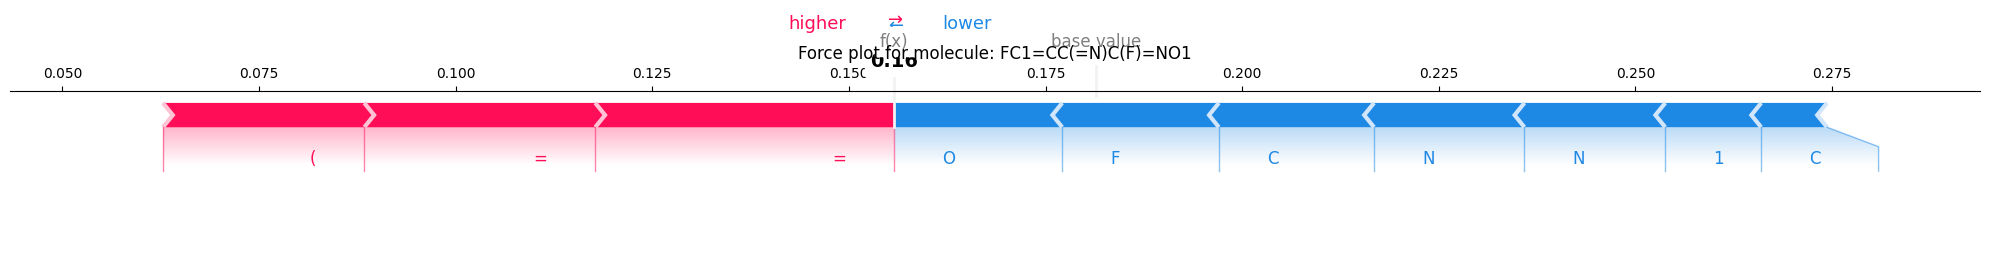

In [47]:
# Create a force plot for a single example
original_predictions = wrapped_model(test_padded_float[:1]).cpu().detach().numpy()

# For a single example
idx = 0  # First example
molecule = token_samples[idx]
length = len(molecule)

# Ensure SHAP values are in the right format
shap_vals_to_plot = np.array(shap_values[idx, :length])
if len(shap_vals_to_plot.shape) > 1:
    shap_vals_to_plot = shap_vals_to_plot.flatten()

# Create force plot
shap.force_plot(
    explainer.expected_value, 
    shap_vals_to_plot,
    feature_names=molecule,
    matplotlib=True,
    show=False
)
plt.title(f"Force plot for molecule: {''.join(molecule)}")
plt.tight_layout()
plt.savefig('shap_force_plot.png')
plt.show()